In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# KNN Classifier

1.Load iris + split
2.Define the pipleine
3.Fit the model
4.Score on the test set

In [27]:
# data = load_iris()
# df = pd.DataFrame(data=data.data, columns=data.feature_names)
# df.head()

In [33]:
selected_columns = ["sepal length (cm)", "sepal width (cm)"]
iris = load_iris(as_frame=True)

X = iris.data[selected_columns]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [34]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [30]:
type(iris)

sklearn.utils._bunch.Bunch

In [21]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [35]:
params = ("uniform","distance")

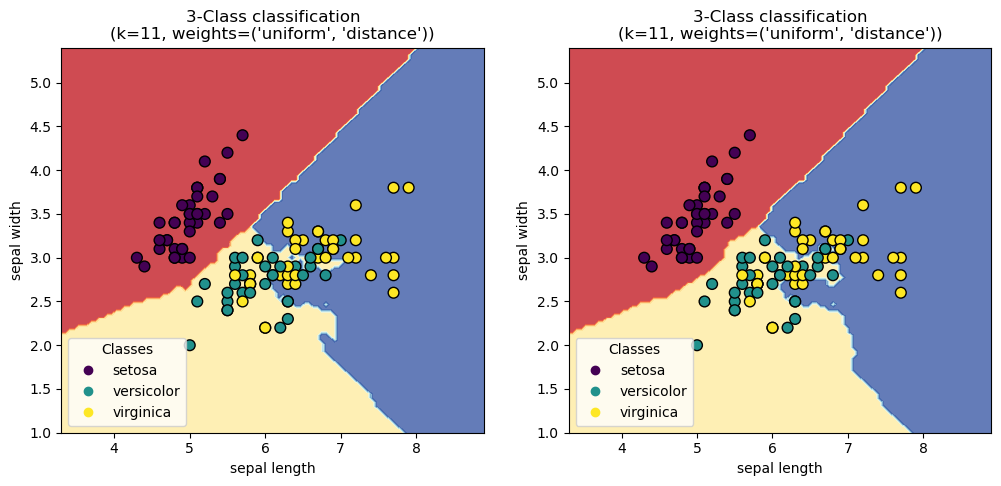

In [36]:
_, axes = plt.subplots(ncols=len(params), figsize=(12, 5))
for ax, param in zip(axes, params):
    model.set_params(knn__weights=param).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_train, cmap=plt.cm.RdYlBu, alpha=0.8, ax=ax, response_method="predict"
    )
    scatter = disp.ax_.scatter(X_train[selected_columns[0]], X_train[selected_columns[1]], c=y_train, s=60, edgecolor="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(f"3-Class classification\n(k={model[-1].n_neighbors}, weights={params!r})")
    ax.set_xlabel("sepal length")
    ax.set_ylabel("sepal width")

In [38]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

In [39]:
k_range = range(1,31)
scores =[]

for k in k_range:
    model.set_params(knn__n_neighbors=k).fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

In [40]:
min(scores), max(scores)

(0.5789473684210527, 0.7368421052631579)

In [ ]:
# TO FINISH!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10,6))
sns.lineplot(x=list(k_range),)

# KNN Regressor

In [41]:
from sklearn import neighbors

In [44]:
#Synthetic data
rng = np.random.RandomState(42)
X_train = np.sort(5 * rng.rand(40,1), axis=0)
X_test = np.linspace(0,5,500)[:, np.newaxis]
y = np.sin(X_train).ravel()
y[::5] += (0.5 - np.random.rand(8))

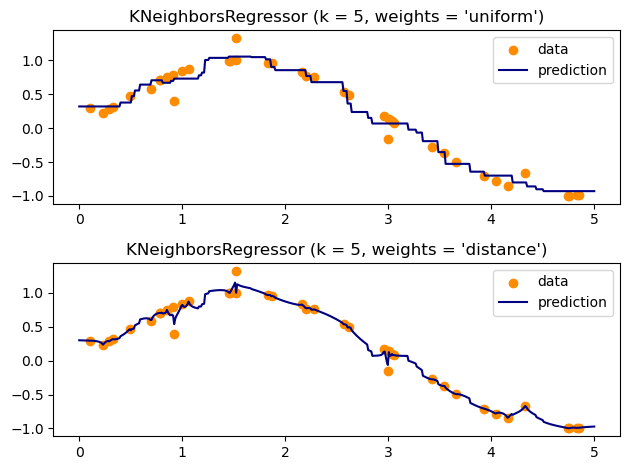

In [45]:
n_neighbors = 5

for i, weights in enumerate(params):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y).predict(X_test)

    plt.subplot(2, 1, i+1)
    plt.scatter(X_train, y, color="darkorange", label="data")
    plt.plot(X_test, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [46]:
n_neighbors_list = [1, 3, 5, 10, 15, 20, 30]

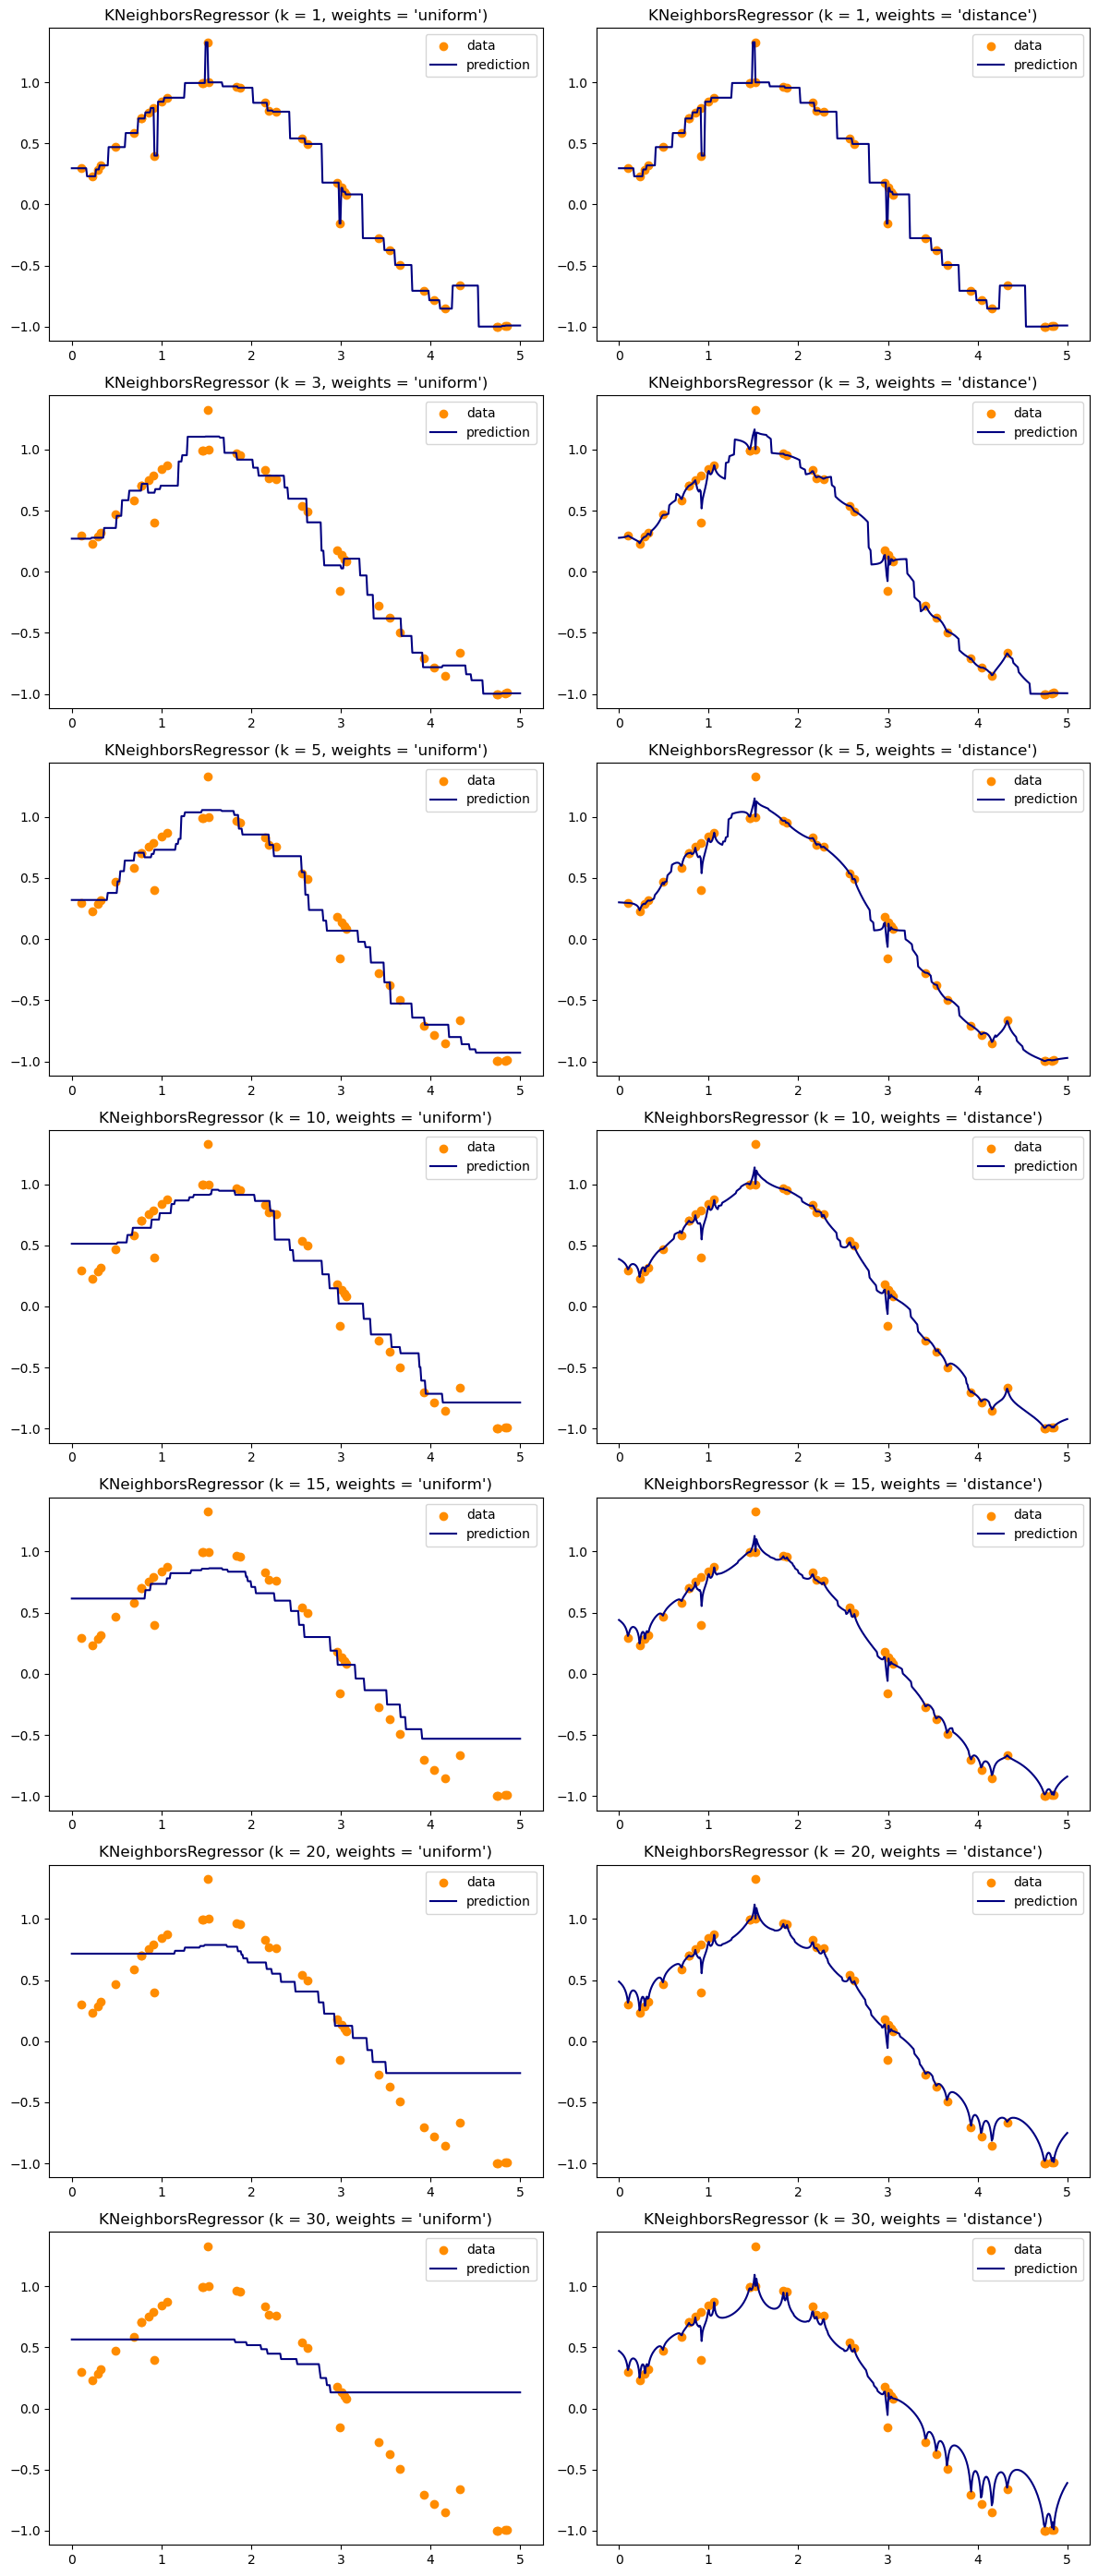

In [47]:
plt.figure(figsize=(12, 4*len(n_neighbors_list)))

for i, k in enumerate(n_neighbors_list):
    for j, weights in enumerate(params):
        knn = neighbors.KNeighborsRegressor(k, weights=weights)
        y_ = knn.fit(X_train, y).predict(X_test)

        plt.subplot(len(n_neighbors_list), 2, i*2 + j + 1)
        plt.scatter(X_train, y, color="darkorange", label="data")
        plt.plot(X_test, y_, color="navy", label="prediction")
        plt.axis("tight")
        plt.legend()
        plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (k, weights))

plt.tight_layout()

# K-Means algorithm

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X, y = make_blobs(n_samples=2000, centers=5, cluster_std=[1.0, 2.5, 0.5, 1.5, 3.0], random_state=42)

In [4]:
X.shape

(2000, 2)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

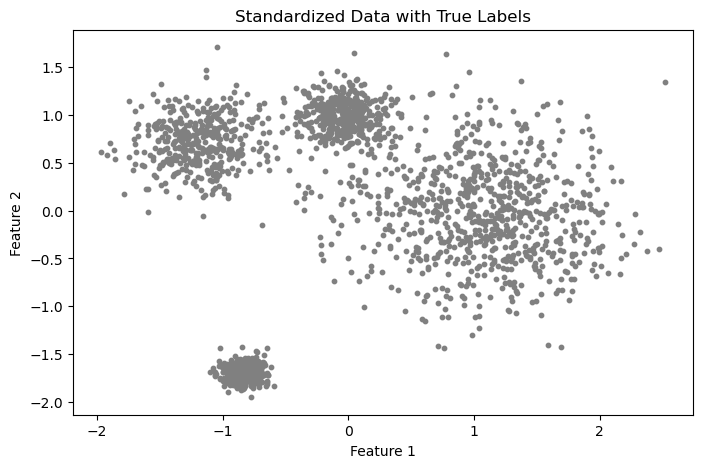

In [6]:
# Visualize the dataset
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, c='gray')
plt.title("Standardized Data with True Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [14]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore") 

sse = []
silhouette_scores = []
ks = range(2,20)

for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled,kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

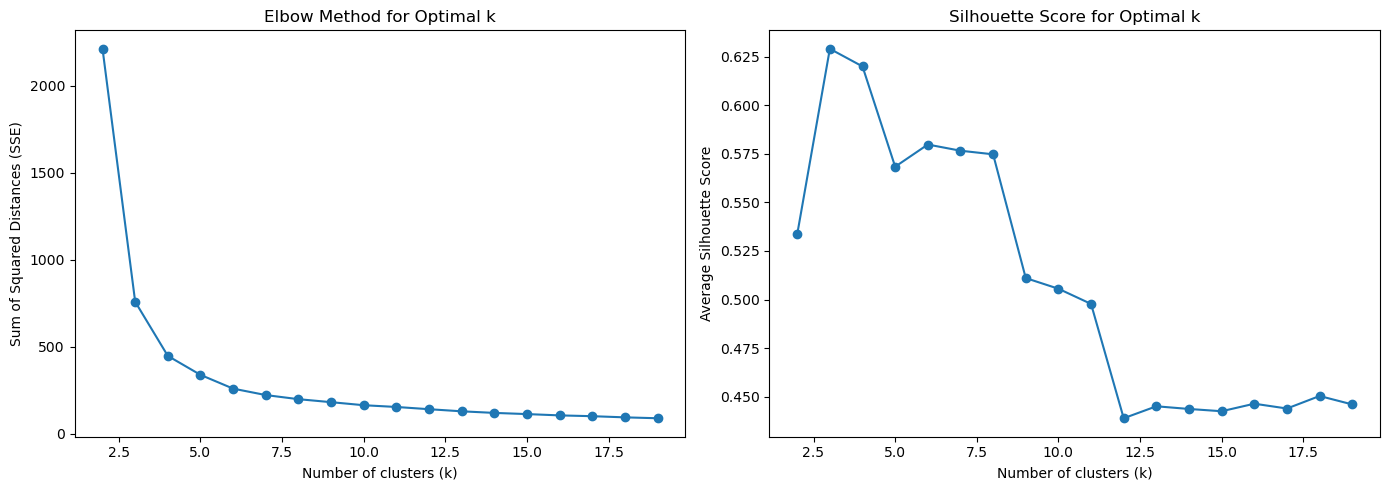

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1.plot(ks, sse, marker="o")
ax1.set_title("Elbow Method for Optimal k")
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Sum of Squared Distances (SSE)")

# Silhouette plot
ax2.plot(ks, silhouette_scores, marker="o")
ax2.set_title("Silhouette Score for Optimal k")
ax2.set_xlabel("Number of clusters (k)")
ax2.set_ylabel("Average Silhouette Score")

plt.tight_layout()

In [16]:
k_opt = 4
kmeans_opt = KMeans(n_clusters=k_opt,random_state=42)
kmeans_opt.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [17]:
labels = kmeans_opt.labels_

In [19]:
type(labels), labels.shape, labels[:10]

(numpy.ndarray, (2000,), array([1, 3, 1, 3, 1, 2, 3, 0, 1, 2]))

In [20]:
kmeans_opt.cluster_centers_ #4 centers of centroids

array([[-0.83024475, -1.68727597],
       [ 1.17531089, -0.08806758],
       [-1.19281705,  0.70935284],
       [ 0.01521014,  0.88980371]])

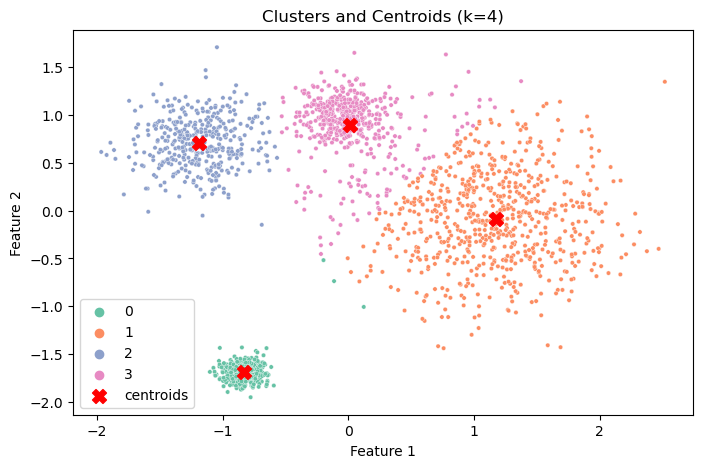

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, s=10, palette="Set2")
plt.scatter(kmeans_opt.cluster_centers_[:,0], kmeans_opt.cluster_centers_[:,1], s=100, c='red', label='centroids', marker='X')
plt.title(f"Clusters and Centroids (k={k_opt})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

In [28]:
# Calculate silhouette scores for each point
sample_silhouette_values = silhouette_samples(X_scaled, labels)
avg_silhouette = silhouette_score(X_scaled, labels)
print(f"Average Silhouette score for {k_opt=}: {avg_silhouette:.3f}")

Average Silhouette score for k_opt=4: 0.620


i=0: [0.07897722 0.19810781 0.2094856  0.84331407]
i=1: [-0.07934283 -0.07871202 -0.07212533 -0.05874515]
i=2: [0.07173849 0.07211718 0.07716738 0.07967901]
i=3: [-0.00950552  0.03651323  0.03872732  0.06091711]


Text(0, 0.5, 'Cluster Label')

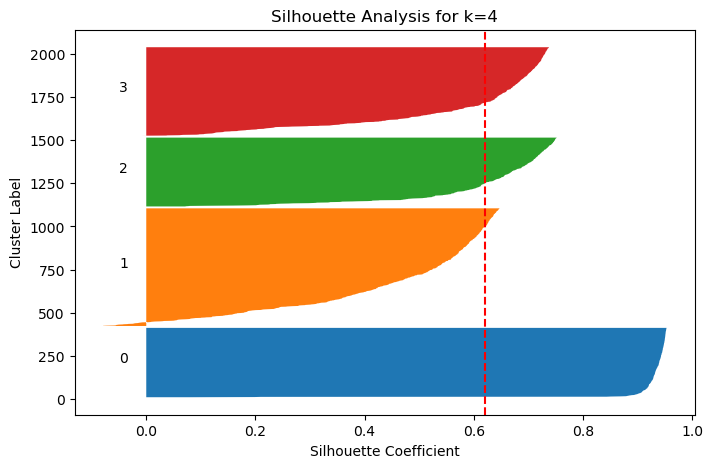

In [29]:
plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(k_opt):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    print(f"{i=}: {ith_cluster_silhouette_values[:4]}")
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color="red", linestyle="--")
plt.title(f"Silhouette Analysis for k={k_opt}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")

# Hierarchical Clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[0, 0], scale=1.0, size=(30, 2)),
    np.random.normal(loc=[3, 4], scale=0.5, size=(30, 2)),
    np.random.normal(loc=[10, 0], scale=1.5, size=(30, 2)),
])

Text(0, 0.5, 'Feature 2')

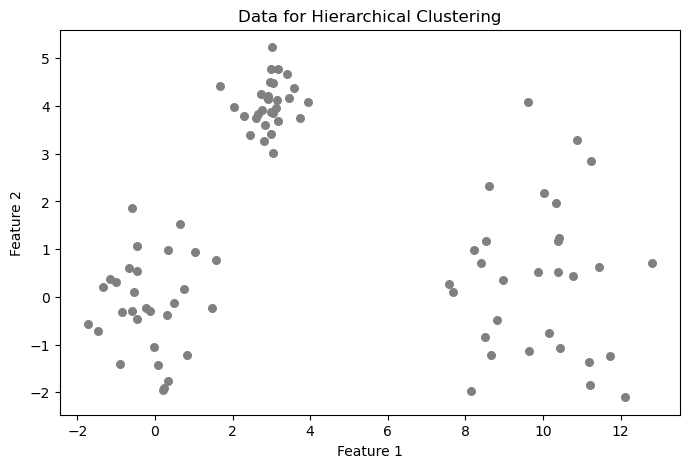

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(data[:, 0], data[:, 1], s=30, c='gray')
plt.title("Data for Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [40]:
agg_clustering = linkage(data,method="ward")

Text(0, 0.5, 'Distance')

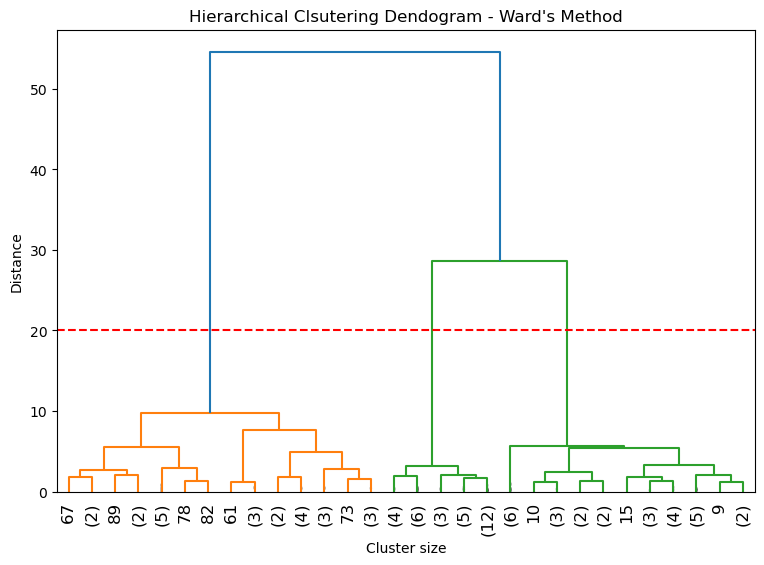

In [50]:
plt.figure(figsize=(9,6))
dendrogram(agg_clustering,truncate_mode="lastp",p=30,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True)
plt.title("Hierarchical Clsutering Dendogram - Ward's Method")
plt.axhline(y=20, color="red", linestyle='--')
plt.xlabel("Cluster size")
plt.ylabel("Distance")

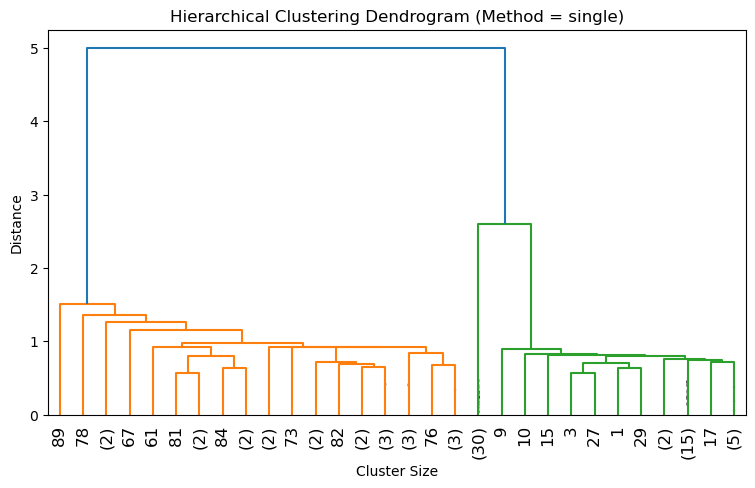

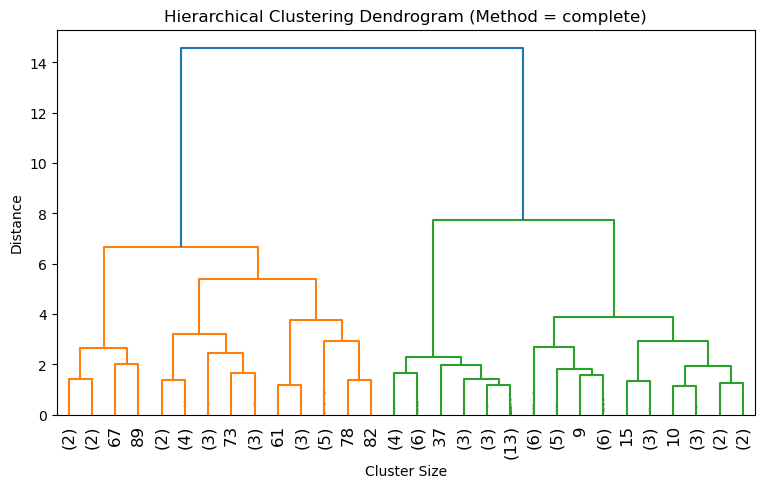

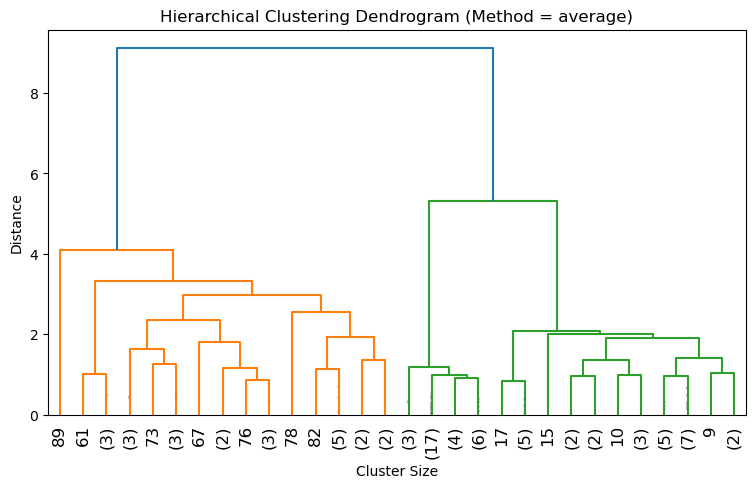

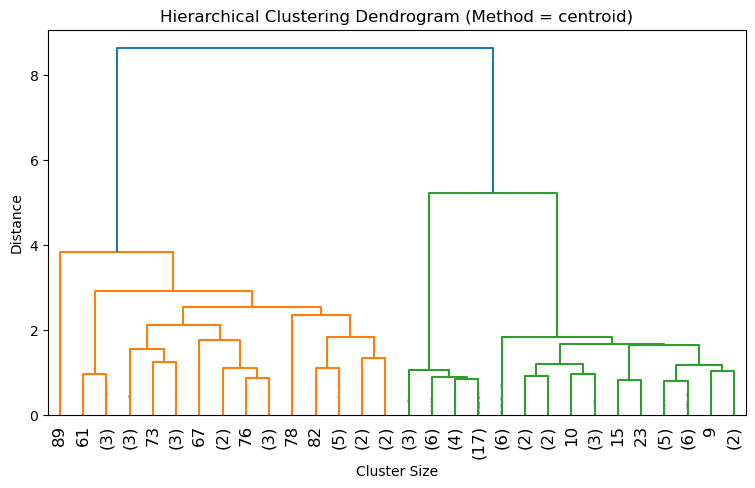

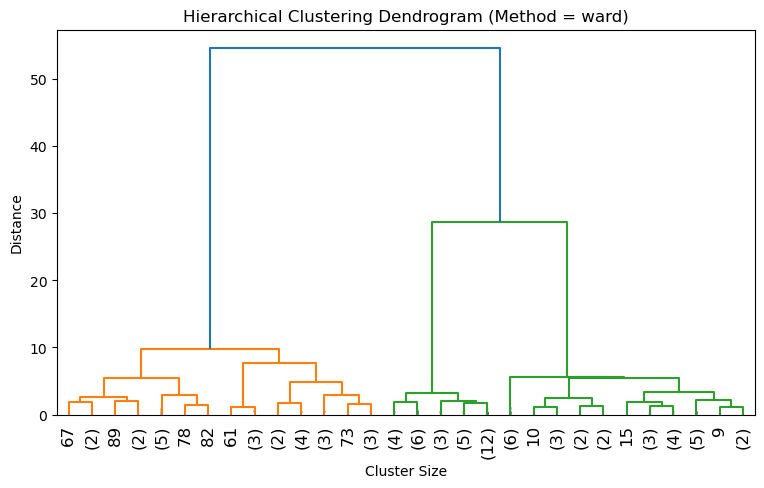

In [51]:
for method in ["single", "complete", "average", "centroid", "ward"]:
    agg_clustering = linkage(data, method=method)
    plt.figure(figsize=(9, 5))
    dendrogram(agg_clustering, truncate_mode="lastp", p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title(f"Hierarchical Clustering Dendrogram (Method = {method})")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance") 

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 3


agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
cluster_labels = agg_model.fit_predict(data)

In [57]:
silhouette_avg = silhouette_score(data,cluster_labels)
print(f"Average Silhouette Score for {n_clusters=}: {silhouette_avg:.3f}")

Average Silhouette Score for n_clusters=3: 0.724


1. Implement Pipeline with scaling
2. Calculate silhouette score for n_clusters between 2 and 10
3. Plot the results

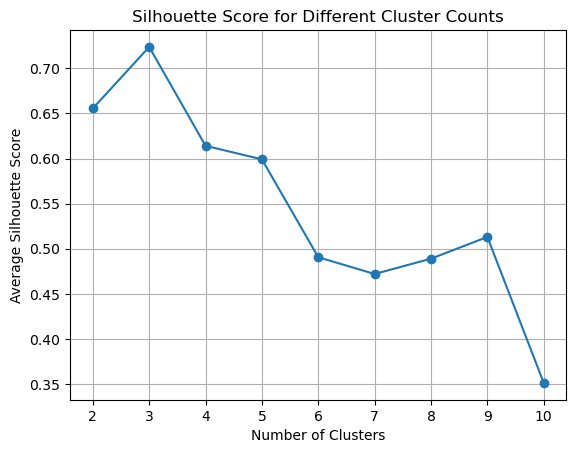

In [82]:
silhouette_avg_list = []

for n in range(2,11):
    pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("agg_clustering", AgglomerativeClustering(n_clusters=n, linkage="ward"))
    ])

    # Fit and predict clusters
    cluster_labels = pipeline.fit_predict(data)
    
    # Calculate silhouette score and add to the list
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_avg_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.grid(True)

In [74]:
silhouette_avg_list

[0.6555810379528718,
 0.7237955348034439,
 0.614131779457418,
 0.5991626680477058,
 0.4906130075934666,
 0.47201363656997736,
 0.489017789540381,
 0.5130911277613454,
 0.35125038150346183]

Text(0, 0.5, 'Feature 2')

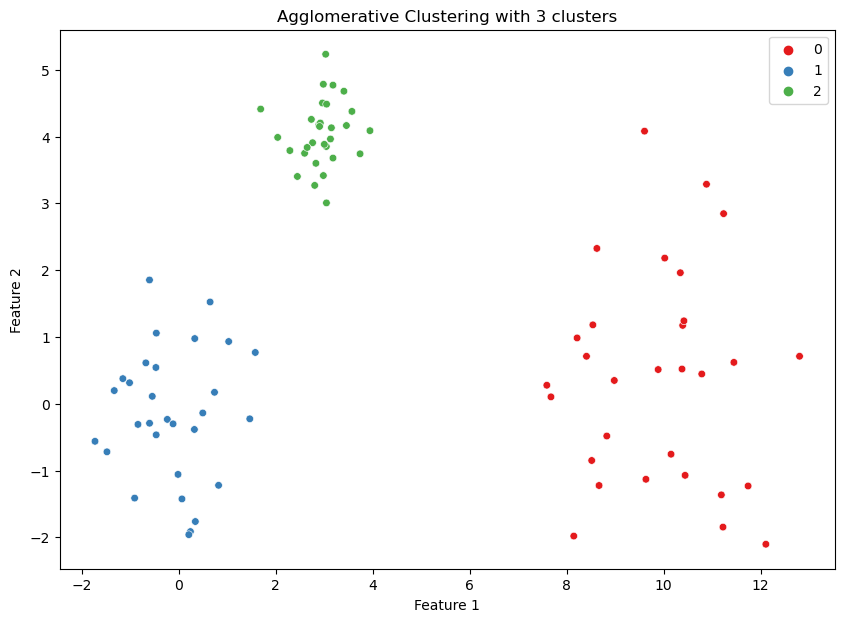

In [83]:
pipeline.set_params(agg_clustering__n_clusters=3)
cluster_labels = pipeline.fit_predict(data)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels, palette="Set1", s=30)
plt.title(f"Agglomerative Clustering with {n_clusters} clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [86]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:04<00:00, 17.2MB/s]

Extracting files...


Path to dataset files: C:\Users\Programista\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4
